# Description
The Walnut Gulch Experimental Watershed (WGEW) is a scientific research site run by the United States Department of Agriculture in collaboration with The University of Arizona.  The research site is located in southern Arizona and it surrounds the city of Tombston Arizona.

## The Data Website
Much of the climate data associated with WGEW is publicly accessible through [online data access](https://www.tucson.ars.ag.gov/dap/).  The online data access site has become a bit dated over time and is not configured to operate like a web service.  However, the site is currently constructed so that building a spider to harvest the data is possible.  

## Procedure
The first step was to visit the current site's [landing page](https://www.tucson.ars.ag.gov/dap/) and determine what the data mean and what data are available.  For the project, I was interested in harvesting precipitation data for all of the raingages at WGEW.  The [raingage page](https://www.tucson.ars.ag.gov/dap/gage_locations.asp) has a list of all raingages with location data.  The spider visited that page and created a list or data dictionary of all the raingages.

After the raingage information was collected the precipitation data for each raingage was downloaded.  [The precipitation download page](https://www.tucson.ars.ag.gov/dap/event.asp) consists of a web form that could be submitted for each raingage and produced a comma-delimmeted data set.

The precipitation data was saved to a raw data text file.  The raw data contain some meta data that is created by the website and does not fit into a data-only csv file.  The next step involved building a script method that would clean the raw data and put it into a properly formated csv file.  This post-processing method removed all metadadta, leaving a clean csv file.

# Simple Analysis
The steps shown in this notebook demonstrate example of how the precipitation data that was scraped from the WGEW site and analyzed to produce something possibly meaningful from the data.  There are approximately 65 raingages, for the analysis steps, I only used a small number of raingages.  Also, the WGEW website has two different year ranges for downloading precipitation data.  One time range covers from 1955 through 1993.  The other time range spans the year 2000 to the present.  The spider and analysis only process the 1955 through 1993 years for now.



In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import dateutil

# Read the data and display a little bit of it.
df = pd.read_csv('precip.csv', sep='|', parse_dates=[1])
df['month'] = df.Date.dt.month
df['day'] = df.Date.dt.day
df['year'] = df.Date.dt.year

df.tail(5)

,Gage,Date,Time,Duration,Depth,Time_Est,month,day,year
215227,9,1999-09-13,14:52,36,0.05,N,9,13,1999
215228,9,1999-09-16,18:08,172,0.34,N,9,16,1999
215229,9,1999-09-18,13:37,37,0.23,N,9,18,1999
215230,9,1999-09-20,20:10,290,0.03,Y,9,20,1999
215231,9,1999-09-23,13:01,16,0.02,N,9,23,1999


In [9]:
# Get all data from gage 1
gage1 = df[df['Gage'] == 1]
gage1.tail(5)

,Gage,Date,Time,Duration,Depth,Time_Est,month,day,year
196702,1,1999-09-15,19:29,40,0.05,N,9,15,1999
196703,1,1999-09-16,18:17,163,0.72,N,9,16,1999
196704,1,1999-09-18,13:01,76,1.15,N,9,18,1999
196705,1,1999-09-19,21:14,18,0.02,N,9,19,1999
196706,1,1999-09-21,00:32,89,0.01,N,9,21,1999


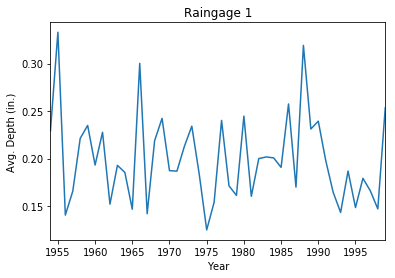

In [10]:
# Show a plot of the aggregate data
summary = gage1.groupby(['year']).mean()
depths = summary.loc[:, 'Depth']
p = depths.plot(title='Raingage 1')
p.set_ylabel('Avg. Depth (in.)')
p.set_xlabel('Year')
plt.show()

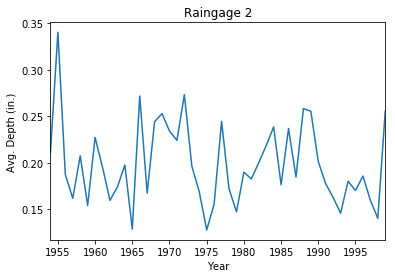

In [11]:
# Get all data from gage 2
gage2 = df[df['Gage'] == 2]
summary = gage2.groupby(['year']).mean()
depths = summary.loc[:, 'Depth']
p = depths.plot(title='Raingage 2')
p.set_ylabel('Avg. Depth (in.)')
p.set_xlabel('Year')
plt.show()

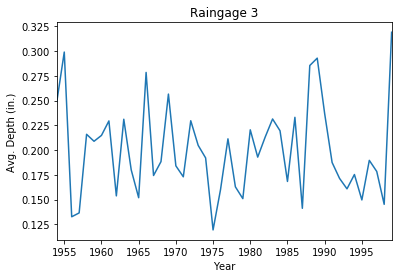

In [12]:
# Get all data from gage 3
gage3 = df[df['Gage'] == 3]
summary = gage3.groupby(['year']).mean()
depths = summary.loc[:, 'Depth']
p = depths.plot(title='Raingage 3')
p.set_ylabel('Avg. Depth (in.)')
p.set_xlabel('Year')
plt.show()


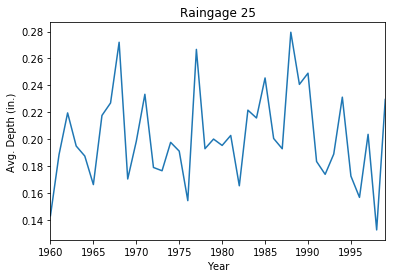

In [13]:
# Get all data from gage 25
gage25 = df[df['Gage'] == 25]
summary = gage25.groupby(['year']).mean()
depths = summary.loc[:, 'Depth']
p = depths.plot(title='Raingage 25')
p.set_ylabel('Avg. Depth (in.)')
p.set_xlabel('Year')
plt.show()
